In [1]:
import matplotlib.pyplot as plt
import numpy as np

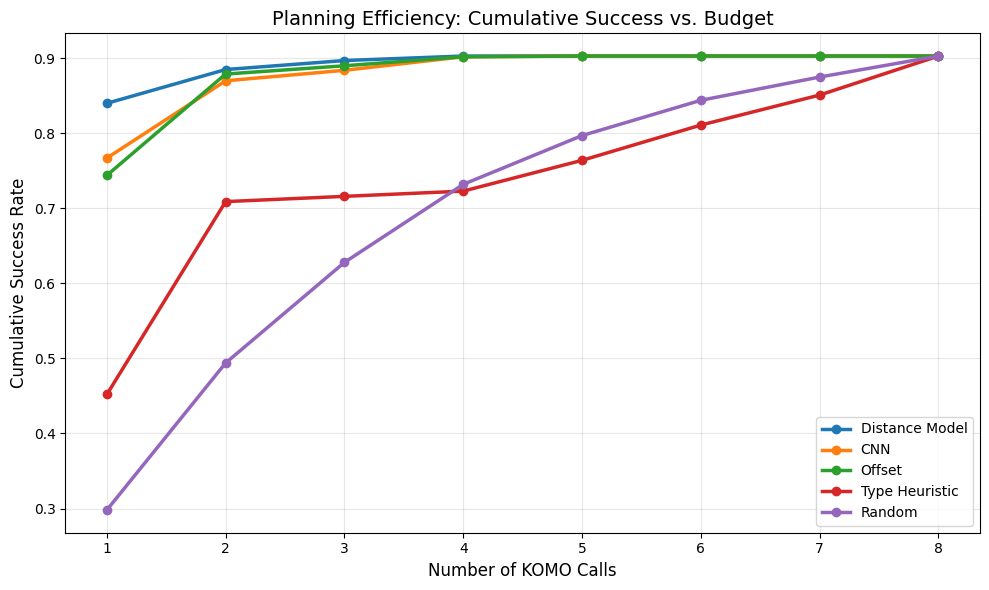

In [2]:
methods = ["Distance Model", "CNN", "Offset", "Type Heuristic", "Random"]
cumulative = {
    "Distance Model": [0.840, 0.885, 0.897, 0.903, 0.903, 0.903, 0.903, 0.903],
    "CNN": [0.767, 0.870, 0.884, 0.902, 0.903, 0.903, 0.903, 0.903],
    "Offset": [0.744, 0.879, 0.890, 0.902, 0.903, 0.903, 0.903, 0.903],
    "Type Heuristic": [0.452, 0.709, 0.716, 0.723, 0.764, 0.811, 0.851, 0.903],
    "Random": [0.298, 0.494, 0.628, 0.732, 0.797, 0.844, 0.875, 0.903],
}

plt.figure(figsize=(10, 6))
for method, values in cumulative.items():
    plt.plot(range(1, 9), values, marker="o", linewidth=2.5, label=method)

plt.xlabel("Number of KOMO Calls", fontsize=12)
plt.ylabel("Cumulative Success Rate", fontsize=12)
plt.title("Planning Efficiency: Cumulative Success vs. Budget", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("cumulative_success.pdf", dpi=300)

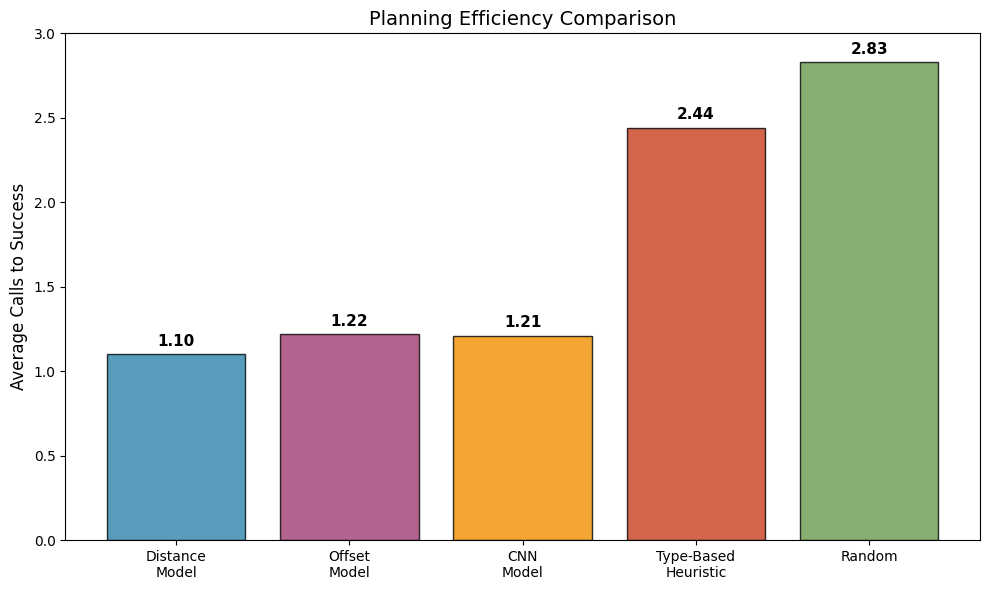

In [3]:
plt.figure(figsize=(10, 6))
methods = ["Distance\nModel", "Offset\nModel", "CNN\nModel", "Type-Based\nHeuristic", "Random"]
avg_calls = [1.10, 1.22, 1.21, 2.44, 2.83]
colors = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#6A994E"]

bars = plt.bar(methods, avg_calls, color=colors, alpha=0.8, edgecolor="black")
plt.ylabel("Average Calls to Success", fontsize=12)
plt.title("Planning Efficiency Comparison", fontsize=14)
plt.ylim(0, 3.0)

for bar, val in zip(bars, avg_calls):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f"{val:.2f}", ha="center", fontsize=11, fontweight="bold")

plt.tight_layout()
plt.savefig("avg_calls_comparison.pdf", dpi=300)

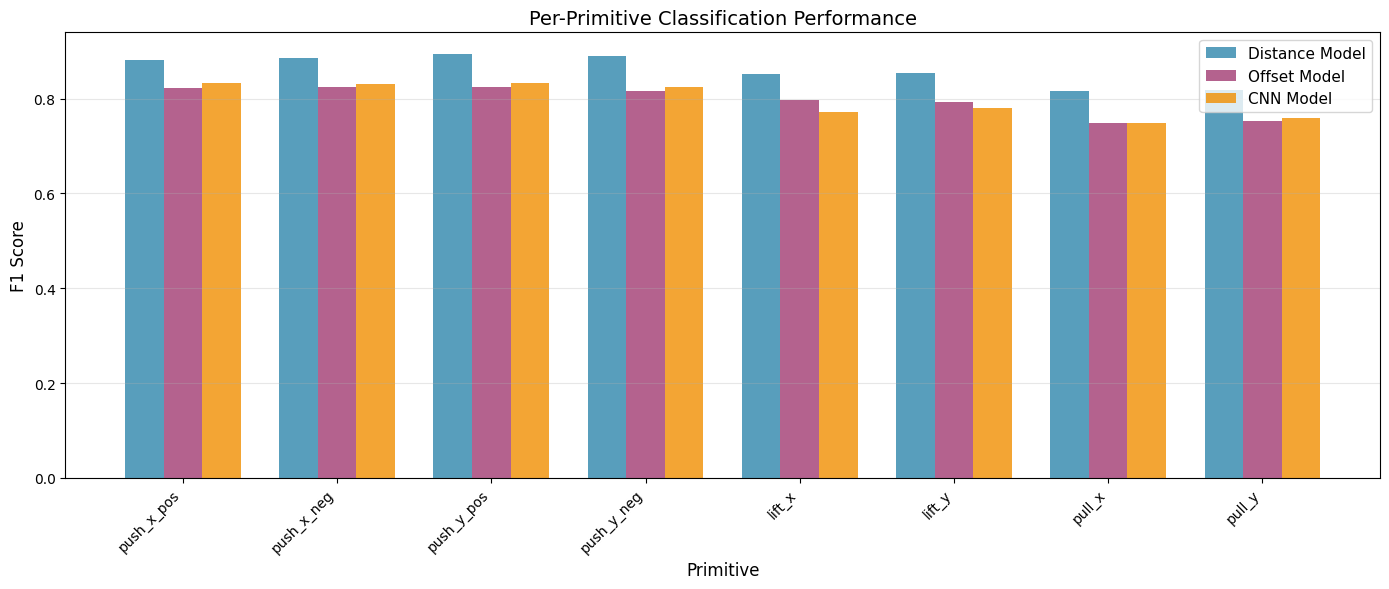

In [4]:
primitives = ["push_x_pos", "push_x_neg", "push_y_pos", "push_y_neg", "lift_x", "lift_y", "pull_x", "pull_y"]
distance_f1 = [0.881, 0.886, 0.895, 0.890, 0.852, 0.854, 0.817, 0.819]
offset_f1 = [0.822, 0.825, 0.825, 0.816, 0.798, 0.793, 0.749, 0.752]
cnn_f1 = [0.833, 0.830, 0.832, 0.824, 0.771, 0.781, 0.749, 0.759]

x = np.arange(len(primitives))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width, distance_f1, width, label="Distance Model", color="#2E86AB", alpha=0.8)
ax.bar(x, offset_f1, width, label="Offset Model", color="#A23B72", alpha=0.8)
ax.bar(x + width, cnn_f1, width, label="CNN Model", color="#F18F01", alpha=0.8)

ax.set_ylabel("F1 Score", fontsize=12)
ax.set_xlabel("Primitive", fontsize=12)
ax.set_title("Per-Primitive Classification Performance", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(primitives, rotation=45, ha="right")
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.savefig("per_primitive_f1.pdf", dpi=300)

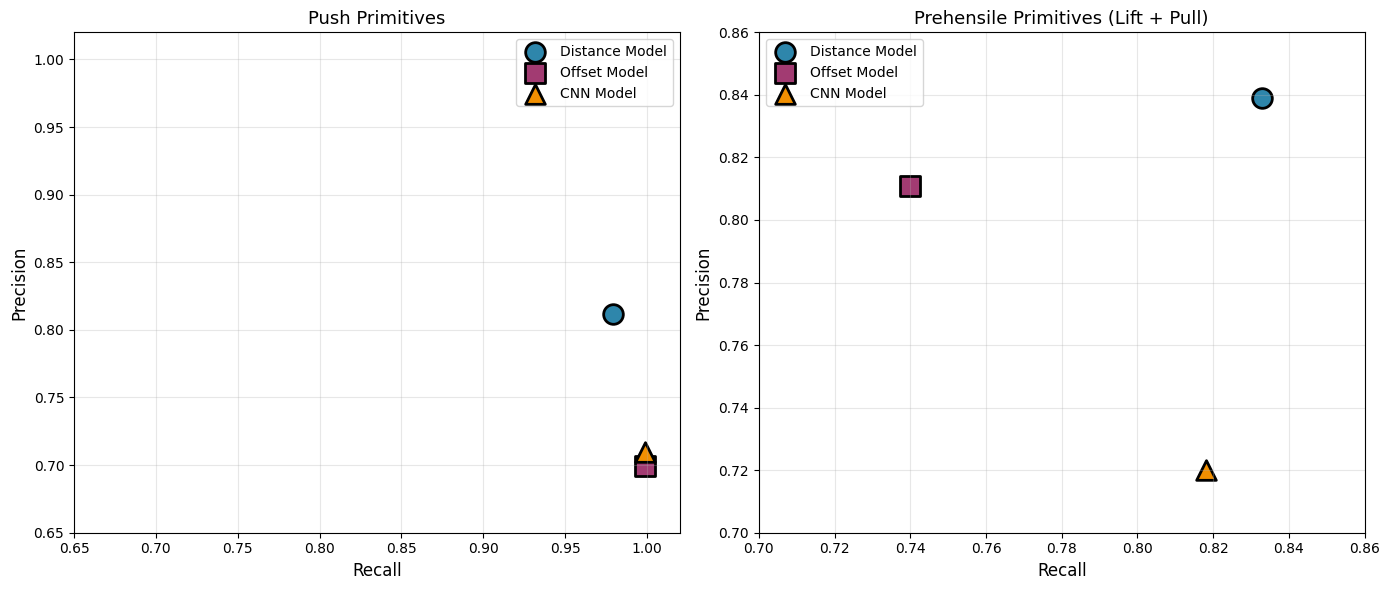

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Push primitives
distance_push = {"prec": 0.812, "rec": 0.979}
offset_push = {"prec": 0.699, "rec": 0.999}
cnn_push = {"prec": 0.710, "rec": 0.999}

ax1.scatter(distance_push["rec"], distance_push["prec"], s=200, marker="o", color="#2E86AB", label="Distance Model", edgecolor="black", linewidth=2)
ax1.scatter(offset_push["rec"], offset_push["prec"], s=200, marker="s", color="#A23B72", label="Offset Model", edgecolor="black", linewidth=2)
ax1.scatter(cnn_push["rec"], cnn_push["prec"], s=200, marker="^", color="#F18F01", label="CNN Model", edgecolor="black", linewidth=2)

ax1.set_xlabel("Recall", fontsize=12)
ax1.set_ylabel("Precision", fontsize=12)
ax1.set_title("Push Primitives", fontsize=13)
ax1.set_xlim(0.65, 1.02)
ax1.set_ylim(0.65, 1.02)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Prehensile primitives
distance_preh = {"prec": 0.839, "rec": 0.833}
offset_preh = {"prec": 0.811, "rec": 0.740}
cnn_preh = {"prec": 0.720, "rec": 0.818}

ax2.scatter(distance_preh["rec"], distance_preh["prec"], s=200, marker="o", color="#2E86AB", label="Distance Model", edgecolor="black", linewidth=2)
ax2.scatter(offset_preh["rec"], offset_preh["prec"], s=200, marker="s", color="#A23B72", label="Offset Model", edgecolor="black", linewidth=2)
ax2.scatter(cnn_preh["rec"], cnn_preh["prec"], s=200, marker="^", color="#F18F01", label="CNN Model", edgecolor="black", linewidth=2)

ax2.set_xlabel("Recall", fontsize=12)
ax2.set_ylabel("Precision", fontsize=12)
ax2.set_title("Prehensile Primitives (Lift + Pull)", fontsize=13)
ax2.set_xlim(0.70, 0.86)
ax2.set_ylim(0.70, 0.86)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig("precision_recall_comparison.pdf", dpi=300)